# Бэггинг и случайный лес

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import numpy as np
import seaborn as sns

Загрузка датасета digits с помощью функции load_digits из sklearn.datasets и подготовка матрицы признаков X и ответов на обучающей выборке y (потребуются поля data и target в объекте, который возвращает load_digits).

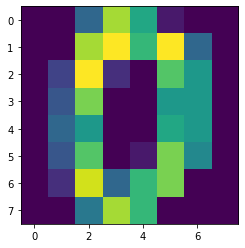

In [3]:
digits = load_digits()
plt.imshow(digits.images[0])

In [4]:
X = digits.data
y = digits.target

### DecisionTreeClassifier с настройками по умолчанию

In [5]:
dt_cls = DecisionTreeClassifier()

In [6]:
cvs = cross_val_score(dt_cls, X, y, cv=10)

In [7]:
print(cvs)
print('Mean score: ' + str(cvs.mean()))

[0.8        0.83888889 0.82777778 0.82777778 0.78333333 0.87222222
 0.88333333 0.83240223 0.81005587 0.80446927]
Mean score: 0.8280260707635009


### Бэггинг над DecisionTreeClassifier со 100 деревьями

In [8]:
bagging = BaggingClassifier(dt_cls, n_estimators=100)

In [9]:
cvs = cross_val_score(bagging, X, y, cv=10)

In [10]:
print(cvs)
print('Mean score: ' + str(cvs.mean()))

[0.86666667 0.95       0.9        0.93888889 0.92222222 0.97222222
 0.96666667 0.91061453 0.86592179 0.90502793]
Mean score: 0.9198230912476724


### Бэггинг на $\sqrt{d}$ случайных признаках

In [11]:
n_features = digits.data.shape[1]
bagging = BaggingClassifier(dt_cls, n_estimators=100, max_features=int(np.sqrt(n_features)))

In [12]:
cvs = cross_val_score(bagging, X, y, cv=10)

In [13]:
print(cvs)
print('Mean score: ' + str(cvs.mean()))

[0.88888889 0.94444444 0.92222222 0.87777778 0.94444444 0.95555556
 0.96666667 0.97765363 0.89385475 0.90502793]
Mean score: 0.9276536312849164


### Бэггинг на рандомизированных деревьях

In [14]:
dt_cls = DecisionTreeClassifier(max_features=int(np.sqrt(n_features)))
bagging = BaggingClassifier(dt_cls, n_estimators=100)

In [15]:
cvs = cross_val_score(bagging, X, y, cv=10)

In [16]:
print(cvs)
print('Mean score: ' + str(cvs.mean()))

[0.92222222 0.97777778 0.93888889 0.94444444 0.96666667 0.97777778
 0.96666667 0.95530726 0.94413408 0.94413408]
Mean score: 0.9538019863438857
